In [1]:
# Stefan Nielsen 2018
## the inline option is necessary for Latex export of figures:
%matplotlib inline 
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import plot, xlabel, ylabel
import pandas as pd
from xlrd import open_workbook
## This sets PDF format for export to LaTeX,
## while allowing inline SVG in the notebook:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

In [251]:
## Alternative options:
#%matplotlib notebook
#%config InlineBackend.figure_format = 'pdf'
#%config InlineBackend.figure_format = 'png'
#%config InlineBackend.figure_format = 'svg'
#from matplotlib import animation, rc, interactive
#import matplotlib.ticker as ticker
#matplotlib.interactive(True)
#from pylab import *
#from scipy import arange
#from IPython import display
#plt.rcParams.update({'figure.figsize': (10,7)})
# LaTeX support, with pslatex package :
#plt.rc('text', usetex=True);plt.rc('font', family='serif')
#matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}',r'\usepackage{pslatex}']

# Parameters of rock samples:
$$\begin{split}
\mu'=24.3\ \textrm{ GPa}\\
\lambda=39.1\ \textrm{ GPa}\\
\rho=2700 \textrm{ kg m}^{-3}\\
V_p= 5699\textrm{ m/s}\\ 
V_s= 3000\textrm{ m/s}
\end{split}$$

## import xlsx file, show contents, use contents

In [252]:
mu=24.3e9
df=pd.read_excel("event_params.xlsx")
df

,Event,t0/2e-7,t1/2e-7,tw,rise time (s),tc,Sn,mu0,muR,∆mu,∆tau,Vr,Vmax,U,Dc,Dc ida
0,157_28c,1927,3000,2243,0.000215,0.000063,75000000,0.5,0.4354,0.0646,4845000.0,1100,0.1856,0.000013,0.000005,0.000002
1,157_68e,2003,3038,2277,0.000207,0.000055,75000000,0.5,0.4284,0.0716,5370000.0,1000,0.1417,0.000009,0.000004,0.000002
2,159_184,1984,2725,2539,0.000148,0.000111,80000000,0.5,0.3557,0.1443,11544000.0,2500,0.1792,0.000012,0.000011,0.000023
3,159_237,1984,2772,2298,0.000158,0.000063,100000000,0.5,0.3055,0.1945,19450000.0,2190,0.1467,0.000013,0.000006,0.000019
4,159_240,2000,2777,2589,0.000155,0.000118,100000000,0.5,0.2902,0.2098,20980000.0,2560,0.1632,0.000014,0.000013,0.000045
5,160_27,2000,3981,2329,0.000396,0.000066,58000000,0.5,0.2253,0.2747,15932600.0,2166,0.3548,0.000083,0.000015,0.000016
6,160_79,1981,4191,2352,0.000442,0.000074,73000000,0.5,0.1703,0.3297,24068100.0,1460,0.3455,0.000085,0.000016,0.000018
7,160_124,1955,4230,2390,0.000455,0.000087,75000000,0.5,0.1018,0.3982,29865000.0,1797,0.5300,0.000129,0.000027,0.000033
8,160_130,1867,4300,2398,0.000487,0.000106,76000000,0.5,0.0968,0.4032,30643200.0,1800,0.5199,0.000127,0.000017,0.000041


In [253]:
Vmean=df["U"]/df['rise time (s)']
nor=df['Sn']/mu

# Make graphics using xlsx contents:

In [254]:
## This sets the dpi resolution for screen and png files:
#plt.rcParams['figure.dpi'] = 120;plt.figure(dpi=120);
# for some reason, it does not work if declared in the initial cell of notebook.
# note that PDF format still takes precedence during export to LaTeX||

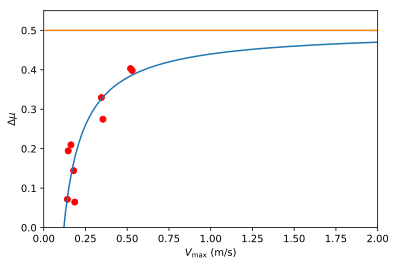

In [255]:
fig1, ax1 = plt.subplots()
xa="$V_\mathrm{max}\ \mathrm{  (m/s)}$";ya='$\Delta \mu$'
ax1.plot(df["Vmax"],(df["mu0"]-df["muR"]),'ro')
xlabel(xa);ylabel(ya)
ax1.set_xlim(left=0);ax1.set_ylim(bottom=0)
ax1.set_xlim(right=2);ax1.set_ylim(top=.55)
x=np.linspace(0.01,2,100)
y=0.5*(1-.12/x)
ax1.plot(x,y);
y=.5+0*x
ax1.plot(x,y);

Fig. 1. Stress drop $\Delta\mu=\mu_0-\mu_{dyn}$ as a function of maximum slip rate $V_\mathrm{max}$ in different experimental microearthquakes (red dots). The theoretical fit (blue curve) uses $\Delta\mu=\mu_0(1-V_w/V)$, which results from $\mu_{dyn}=\mu_0\ V_0/V$, a high-velocity ($V\gg V_w$) approximation of the flash weakening law. Here $V_w=0.12\textrm{ m/s}$ and $\mu_0=0.5$ (orange line, or total stress drop, reached asymtotically for $V\rightarrow\infty$).

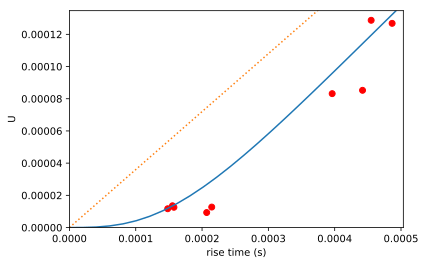

In [54]:
fig4, ax1 = plt.subplots()
xa='rise time (s)';ya='U'
ax1.plot(df[[xa]],df[[ya]],'ro');
xlabel(xa);ylabel(ya)
ax1.set_xlim(left=0);ax1.set_ylim(bottom=0)
#ax1.set_xlim(left=0,right=1e-3);ax1.set_ylim(bottom=0,top=.3e-3)
x=np.linspace(0,2e-3,100)
y=5e2*x**2
vvmax=.12+(x/8e-4)**2
y=.36*x*(1-0.12/vvmax)
ax1.plot(x,y)
y=.36*(x-.0e-4)
ax1.plot(x,y,linestyle='dotted');

Fig. 4. Total slip for each rupture event  as a function of rise time (red dots). 
The theoretical fit (blue curve) is shown assuming the classic scaling relation
$$U=C\ \frac{\sigma\Delta\mu}{\mu'}\ \Gamma$$ where $\Gamma$ is the length of the rupture, $\mu'$ is the shear stiffness, $\sigma$ is the normal stress and $C$ is a geometrical
constant of the order of 1.
Furthermore, we may use $$\Gamma\approx T\ V_r$$ where $T$ is rise time and $V_r$ is rupture velocity. According to approximate relation of stress drop to maximum slip velocity as discussed in Figure 3, we have:
$$
\Delta\mu=\mu_0(1-V_w/V_{max})
$$
And according to the fit of Figure 5, we may replace $V_{max}=0.12+(\frac{T}{8\ 10^{-4}})^2$. As a result we obtain the relation:
$$
\begin{split}
U=\frac{C\ \sigma\ \mu_0\ V_r}{\mu'} \left(1-\frac{V_w}{0.12+(\frac{T}{8\ 10^{-4}})^2}\right)\ T
\\
=0.36\ \left(1-\frac{V_w}{0.12+(\frac{T}{8\ 10^{-4}})^2}\right)\ T
\end{split}
$$
where we have used the indicative values, compatibly with the experimental conditions, of
$\sigma\approx 70\mathrm{ MPa}$, 
$V_r\approx 1000\mathrm{ (m/s)}$,
$\mu'=50\ \mathrm{ GPa}$,
$\mu_0=0.5$,
and set the constant $C=0.6$ to obtain the fit of the experimental points.
The asymptotic value $U=0.36\ T$ at large $T$ is shown as a dotted line. The linear asymptote
corresponds to the maximum possible friction drop (possibly close to total drop 
or $\Delta\mu\approx\mu_0=0.5$) which is achieved at large $V_{max}$ (and large $T$), and whereby self-similar scaling is retrieved. 

# Export to LaTeX (without code cells)

In [55]:
import os
os.system('mkdir build');
os.system('jupyter nbconvert --to=latex --template=latex_nocode.tplx scaling_lab_events.ipynb ')
#the latex_nocode.tplx will eliminate the code cells - the file latex_article.tplx is also needed

0

# compile pdflatex and visualise the result:

In [56]:
os.system('pdflatex -output-directory=build scaling_lab_events')
os.system('open build/scaling_lab_events.pdf')

256

# Export to LaTeX (including code cells)

In [113]:
import os
os.system('mkdir build')
os.system('jupyter nbconvert --to=latex --template=article_plus.tplx scaling_lab_events.ipynb ')
#the latex_nocode.tplx will eleiminate the code cells - the file latex_article.tplx is also needed

0

# Import tab separated file produced by LABVIEW

In [126]:
import pandas as pd
from xlrd import open_workbook
import os 
# two methods:
# 1) Best solution, header lines are skipped directly during pandas reading:
df=pd.read_table('DuTff00175',skiprows=2) #import
#df=pd.read_table('Dutff00175', skiprows=2, delimiter='\t'); # Import w pandas specific delimiter is TAB
# 2) will work only in unix-based systems like Mac or Linux (not windows)
os.system('sed 1,2d DuTff00175 > Dutff00175D2') # Delete first two lines and rewrite in file xxxD2
df1=pd.read_table('Dutff00175D2'); # Import w pandas no specific delimiter
df.iloc[1:10] # show only first 10 lines

,Time(s),Up.Pore.Press.(V),Dwn.Pore.Press.(V),Conf.Press.(V),Volume(V),Force(V),Temp(V),Displ.(V),Pc vol (v),Up.Pore.Press.(MPa),Dwn.Pore.Press.(MPa),Conf.Press.(MPa),Volume(mm3),Force(kN),Temp(degC),Displ.(mm),Pc vol (mm3),Unnamed: 17
1,1.951,-10.429343,-10.374547,0.003220,-0.189189,6.843837,9.331842,0.007040,0.012605,-104.293432,-103.74547,-0.007382,-0.189189,-7.731257,0.0,5.149976,0.012605,NaN
2,2.952,-10.429343,-10.374547,0.003265,-0.189075,6.843237,9.258249,0.007008,0.012662,-104.293432,-103.74547,-0.005862,-0.189075,-7.713611,0.0,5.149940,0.012662,NaN
3,4.952,-10.429343,-10.374547,0.003488,-0.189100,6.843454,9.264830,0.006925,0.012555,-104.293432,-103.74547,0.001737,-0.189100,-7.719979,0.0,5.149846,0.012555,NaN
4,6.953,-10.429343,-10.374547,0.003271,-0.189119,6.844181,9.242601,0.006989,0.012586,-104.293432,-103.74547,-0.005645,-0.189119,-7.741370,0.0,5.149919,0.012586,NaN
5,8.953,-10.429343,-10.374547,0.003188,-0.189113,6.843448,9.308381,0.006970,0.012599,-104.293432,-103.74547,-0.008468,-0.189113,-7.719797,0.0,5.149897,0.012599,NaN
6,10.953,-10.429343,-10.374547,0.003379,-0.189119,6.843798,9.291868,0.006932,0.012586,-104.293432,-103.74547,-0.001954,-0.189119,-7.730107,0.0,5.149854,0.012586,NaN
7,12.954,-10.429343,-10.374547,0.003462,-0.189107,6.843187,9.333234,0.007027,0.012586,-104.293432,-103.74547,0.000868,-0.189107,-7.712138,0.0,5.149962,0.012586,NaN
8,14.958,-10.429343,-10.374547,0.003501,-0.189258,6.843085,9.222428,0.006995,0.012681,-104.293432,-103.74547,0.002171,-0.189258,-7.709122,0.0,5.149926,0.012681,NaN
9,16.959,-10.429343,-10.374547,0.003290,-0.189220,6.843760,9.227819,0.007015,0.012700,-104.293432,-103.74547,-0.004994,-0.189220,-7.728970,0.0,5.149948,0.012700,NaN


In [2]:
%matplotlib notebook 
import matplotlib
import matplotlib.pyplot as plt
from pylab import plot, xlabel, ylabel
fig1, ax1 = plt.subplots()
xa="Time(s)";ya='Force(kN)'
ax1.plot(df[xa],(df[ya]),'-');
xlabel(xa);ylabel(ya);plt.show()

<IPython.core.display.Javascript object>

NameError: name 'df' is not defined

# Reading tables from html web pages

In [3]:
#toto=pd.read_html('https://earthquake.usgs.gov/earthquakes/browse/stats.php',header=None)
toto=pd.read_html('https://earthquake.usgs.gov/earthquakes/browse/stats.php')
toto[0]

,Magnitude,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,8.0+,1,1,0,1,2,1,2,4,0,1,1,1,2,2,1,1,0.0,1.0
1,7–7.9,14,15,13,14,14,10,9,14,12,16,23,19,12,17,11,18,16.0,6.0
2,6–6.9,146,121,127,140,141,140,142,178,168,144,150,185,108,123,143,127,130.0,104.0
3,5–5.9,1344,1224,1201,1203,1515,1693,1712,2074,1768,1896,2209,2276,1401,1453,1574,1419,1550.0,1455.0
4,EstimatedDeaths,231,21357,1685,33819,298101,87992,6605,708,88708,1790,226050,21942,689,1572,756,9624,NaN,NaN


<IPython.core.display.Javascript object>


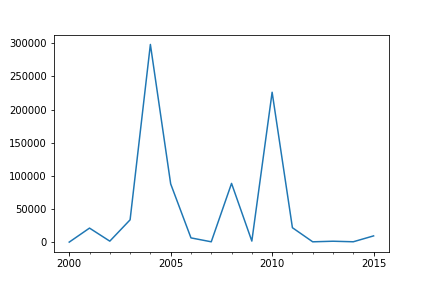

In [4]:
import matplotlib.ticker as ticker
fig,ax=plt.subplots()
ax.plot(toto[0].iloc[4].iloc[1:17])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

<IPython.core.display.Javascript object>


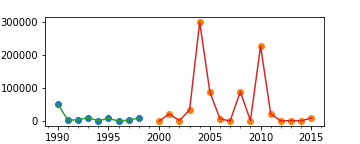

In [5]:
dby2=toto[0].iloc[4].iloc[1:17]
dby1=toto[2].iloc[4].iloc[1:10]
dall=dby1+dby2
fig, ax = plt.subplots(figsize=(5,2));
ax.plot(dby1,'o');
ax.plot(dby2,'o');
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.plot(dby1,'-');
ax.plot(dby2,'-');
#ax.plot(dall)

In [6]:
np.array[dby1]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [7]:
hlist1=toto[0].columns.get_values()
hlist2=toto[2].columns.get_values()

year1=[];deaths1=[];year2=[];deaths2=[]
for i in range(1,17): year1.append(int(hlist1[i]));
for i in range(1,17): deaths1.append(int(toto[0].iloc[4][i])); 
for i in range(1,10): year2.append(int(hlist2[i]));
for i in range(1,10): deaths2.append(int(toto[2].iloc[4][i]));

<IPython.core.display.Javascript object>


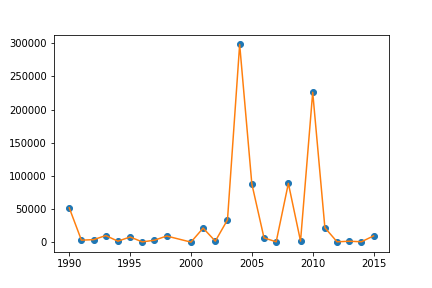

In [8]:
years=year2+year1;deaths=deaths2+deaths1
fig,ax=plt.subplots();
ax.plot(years,deaths,'o');
ax.plot(years,deaths,'-');